<a href="https://colab.research.google.com/github/shravani-01/Cancer-Analysis-in-US/blob/main/Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
#importing necessary library modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

In [ ]:
#importing the cancer2017 dataset
df=pd.read_csv('cancer2017.csv',engine='python')

In [ ]:
#encoding parameter is used since cancer2017.csv contains some non-ASCII value which has to be encoded in utf-8 format
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,�,70,100,�,60,280,�,�,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [ ]:
#the non-ASCII values are interpretted as unicode block symbols i.e. �. It is replaced with NaN values
df.replace({r'[^\x00-\x7F]+':np.nan}, regex=True, inplace=True)
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


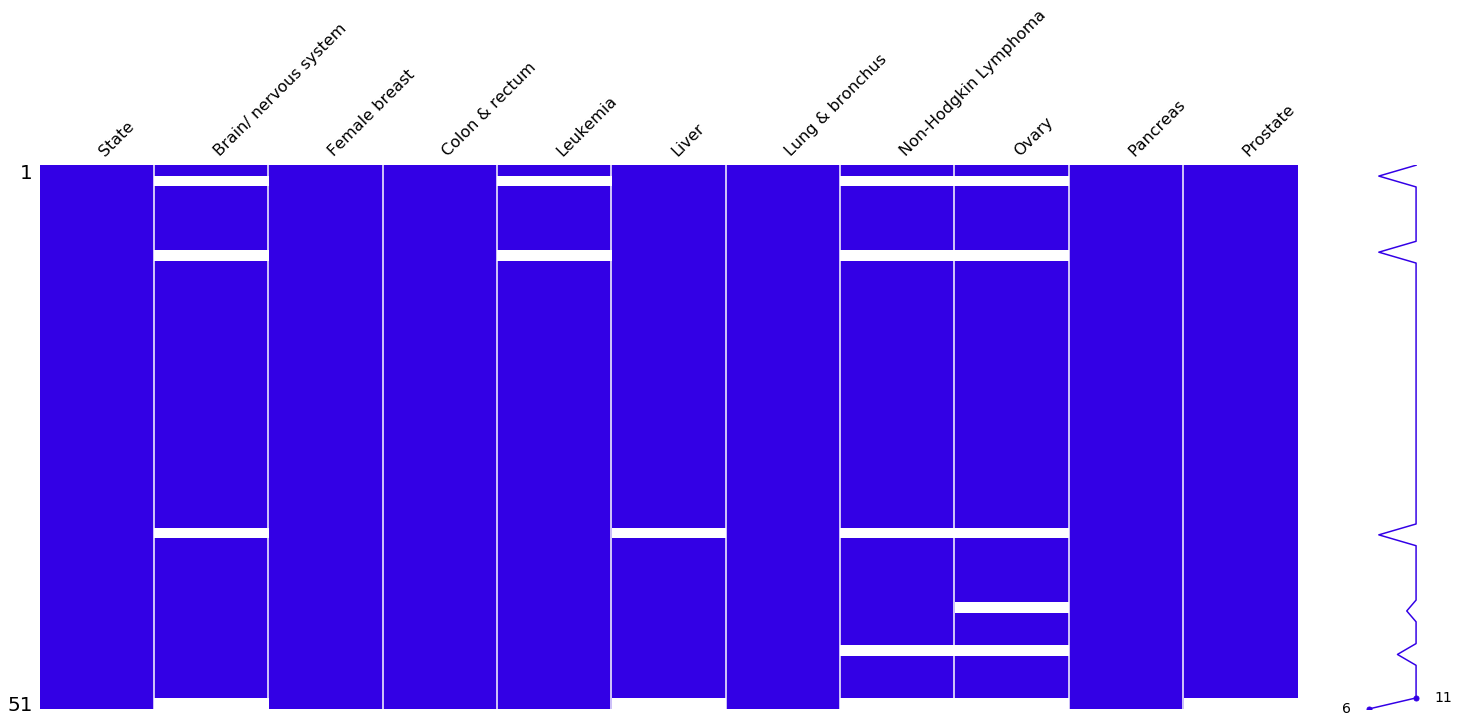

In [ ]:
import missingno as msno
msno.matrix(df,color=(0.2,0,0.9))

In [ ]:
#cleaning the column names
df.columns = [c.strip() for c in df.columns.values.tolist()]
df.columns = [c.replace(' ','') for c in df.columns.values.tolist()]
df.columns

Index(['State', 'Brain/nervoussystem', 'Femalebreast', 'Colon&rectum',
       'Leukemia', 'Liver', 'Lung&bronchus', 'Non-HodgkinLymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [ ]:
#Describing the basic statistical details 
df.describe()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
count,51,47,51,51,49,49,51,46,45,51,50
unique,51,35,44,46,36,37,46,38,30,43,40
top,Texas,50,70,830,550,440,590,110,50,710,70
freq,1,4,3,3,4,3,2,3,4,3,4


In [ ]:
#returning information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
State                  51 non-null object
Brain/nervoussystem    47 non-null object
Femalebreast           51 non-null object
Colon&rectum           51 non-null object
Leukemia               49 non-null object
Liver                  49 non-null object
Lung&bronchus          51 non-null object
Non-HodgkinLymphoma    46 non-null object
Ovary                  45 non-null object
Pancreas               51 non-null object
Prostate               50 non-null object
dtypes: object(11)
memory usage: 4.5+ KB


In [ ]:
#cleaning cell values
for i in range(0,df.shape[0]):
    for j in range(1,df.shape[1]):
        if ',' in str(df.iloc[i][j]):
            df.iloc[i][j]=df.iloc[i][j].replace(',','')
df.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,3200,320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,1020,550,660,2820,430,310,930,600
3,Arkansas,180,420,600,250,280,2160,210,150,430,260
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,3130


In [ ]:
#Converting the columns expect state to numeric values
df=df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
State                  51 non-null object
Brain/nervoussystem    47 non-null float64
Femalebreast           51 non-null int64
Colon&rectum           51 non-null int64
Leukemia               49 non-null float64
Liver                  49 non-null float64
Lung&bronchus          51 non-null int64
Non-HodgkinLymphoma    46 non-null float64
Ovary                  45 non-null float64
Pancreas               51 non-null int64
Prostate               50 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ KB


In [ ]:
df.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.0,650,940,420.0,470.0,3200,320.0,250.0,710,450.0
1,Alaska,NaN,70,100,NaN,60.0,280,NaN,NaN,80,50.0
2,Arizona,380.0,810,1020,550.0,660.0,2820,430.0,310.0,930,600.0
3,Arkansas,180.0,420,600,250.0,280.0,2160,210.0,150.0,430,260.0
4,California,1830.0,4440,5240,2610.0,3750.0,12000,2140.0,1530.0,4510,3130.0


In [ ]:
#Plotting a data with null or NaN values will lead to data inconsistency. 
#To rectify that we will be filling the missing values with the mean value of the corresponding column as stated in the exploratory data analysis.
y=list(df.columns)
bdf=df.copy()
for col in range(1,len(y)):
    bdf[y[col]].fillna((bdf[y[col]].mean()), inplace=True)
bdf.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.00000,650,940,420.000000,470.0,3200,320.000000,250.000000,710,450.0
1,Alaska,352.12766,70,100,499.387755,60.0,280,434.130435,309.333333,80,50.0
2,Arizona,380.00000,810,1020,550.000000,660.0,2820,430.000000,310.000000,930,600.0
3,Arkansas,180.00000,420,600,250.000000,280.0,2160,210.000000,150.000000,430,260.0
4,California,1830.00000,4440,5240,2610.000000,3750.0,12000,2140.000000,1530.000000,4510,3130.0


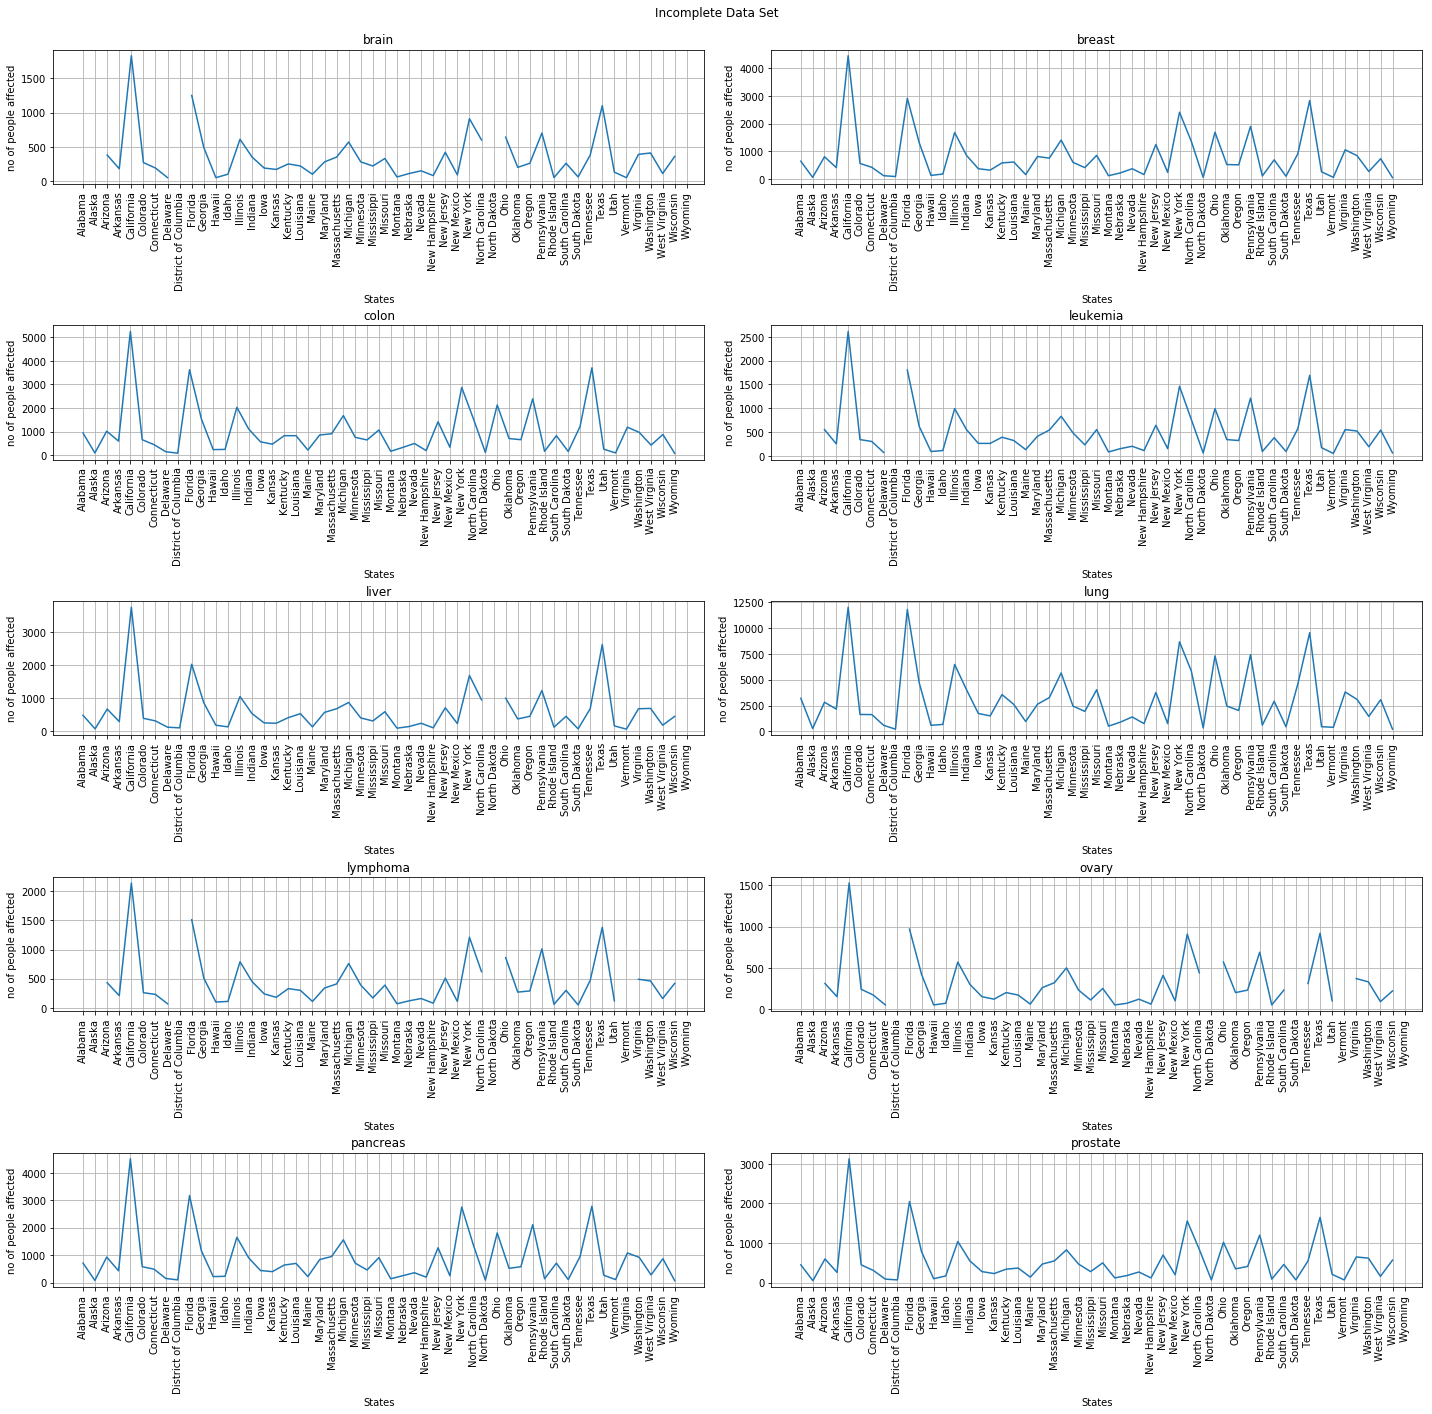

In [ ]:
#creating visualizations with inconsistent dataset
x='State'
i=1
z=["prostate","brain","breast","colon","leukemia","liver","lung","lymphoma","ovary","pancreas"]
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('Incomplete Data Set')
for row in ax:
    for col in row:
        col.plot(df[x],df[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

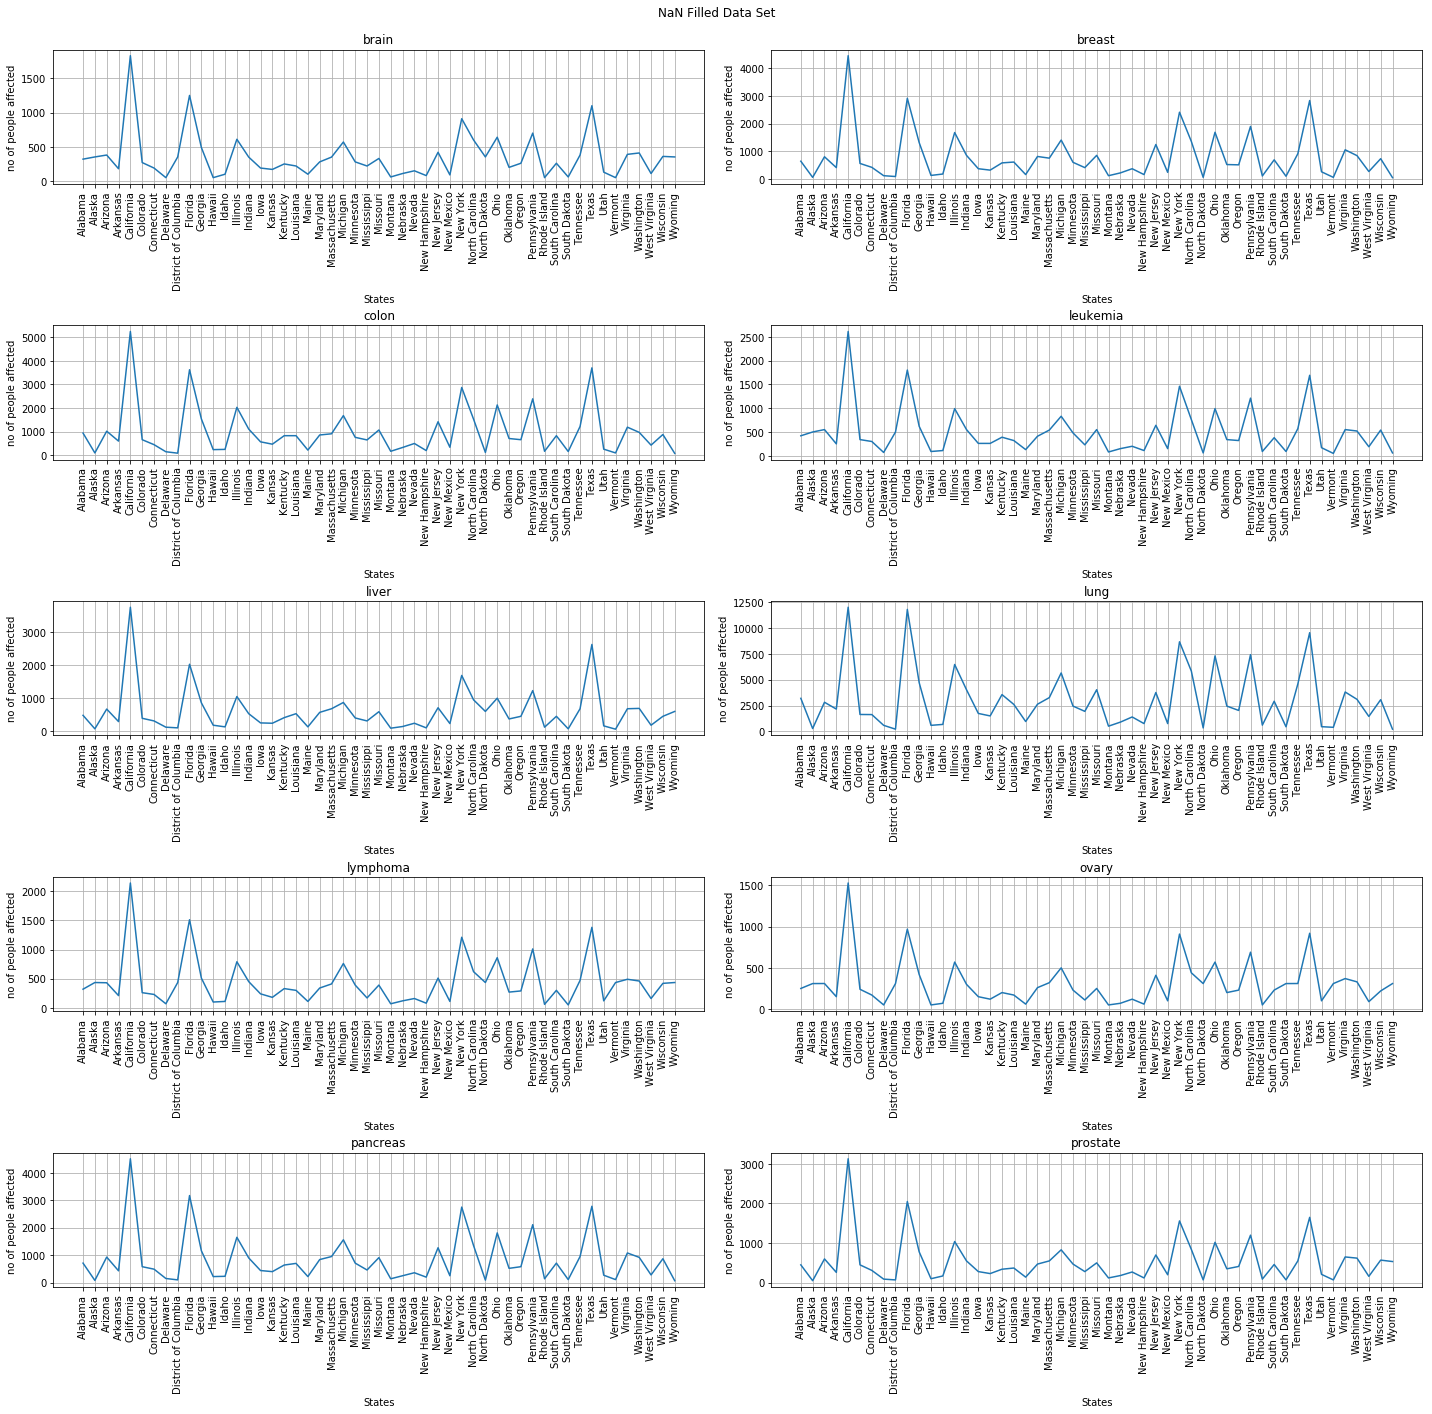

In [ ]:
#after fixing the inconsistent data
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('NaN Filled Data Set')

for row in ax:
    for col in row:
        col.plot(bdf[x],bdf[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

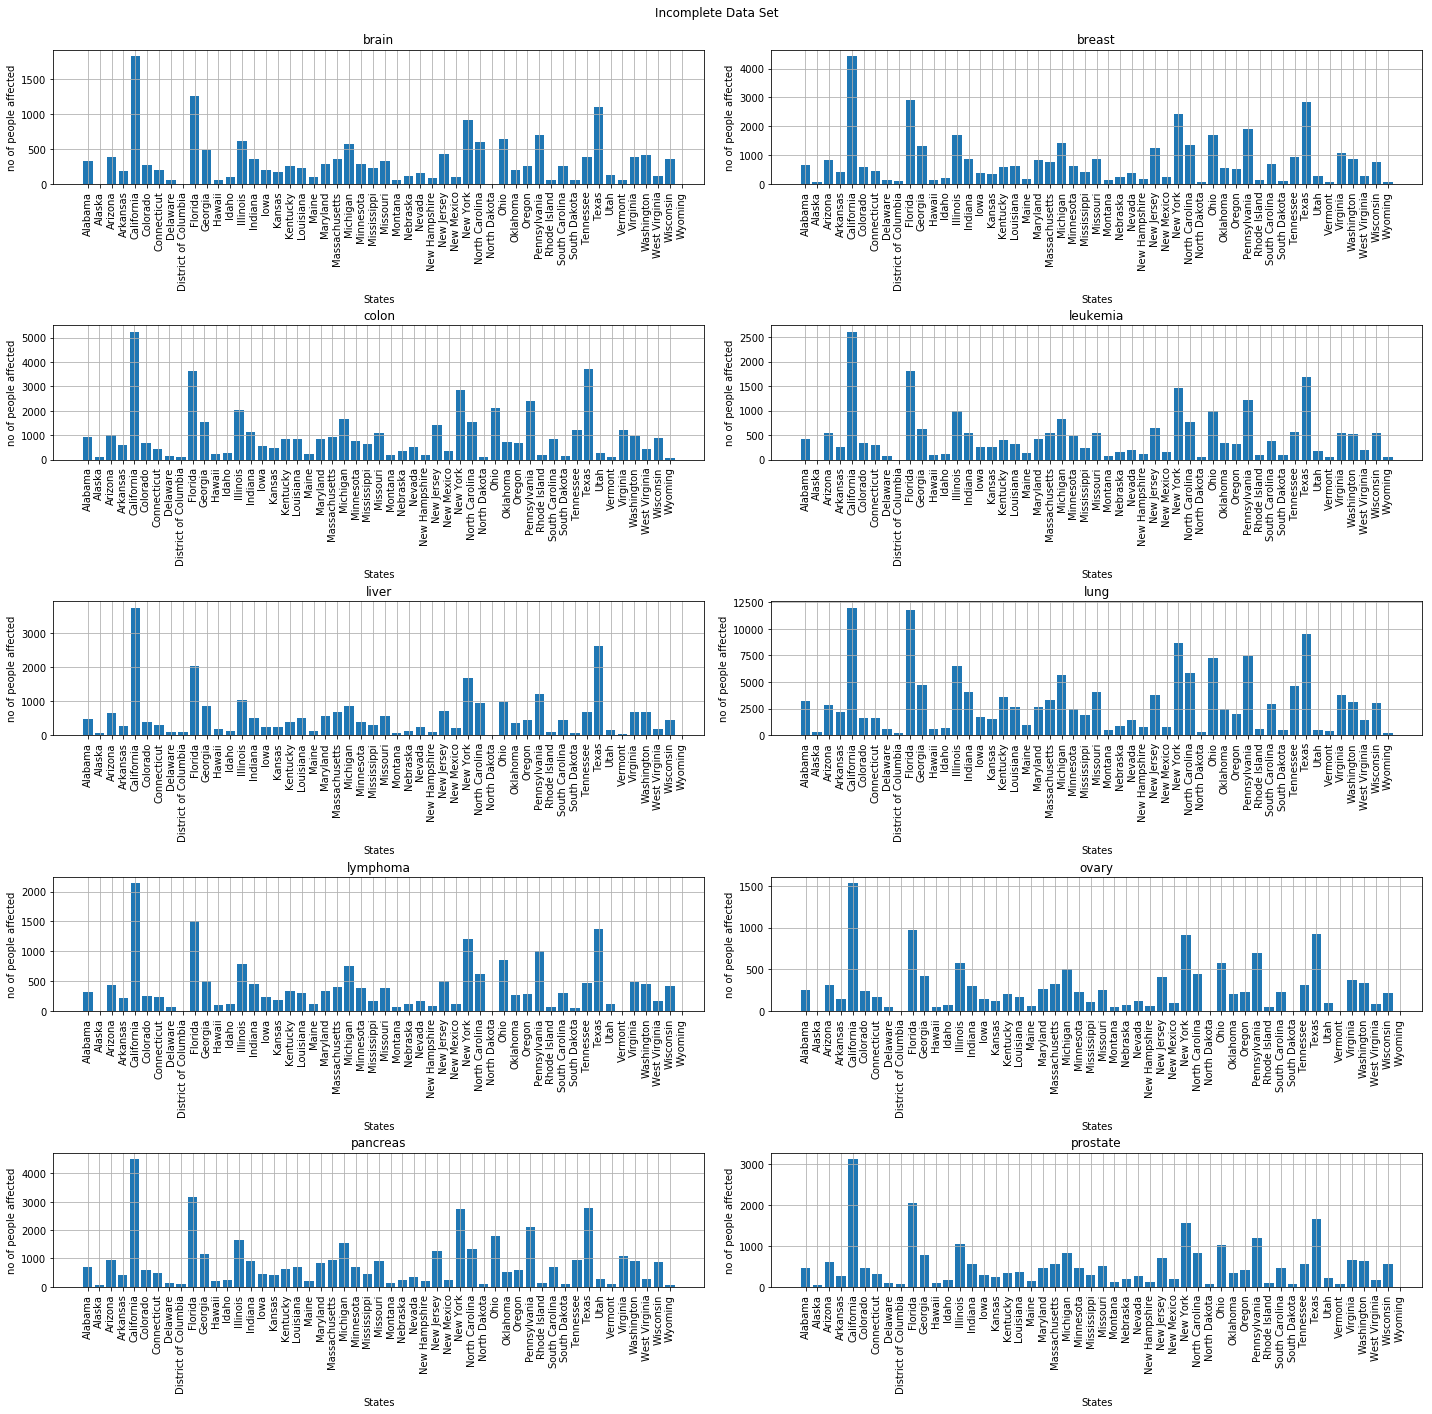

In [ ]:
#Bar plot
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('Incomplete Data Set')

for row in ax:
    for col in row:
        col.bar(df[x],df[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

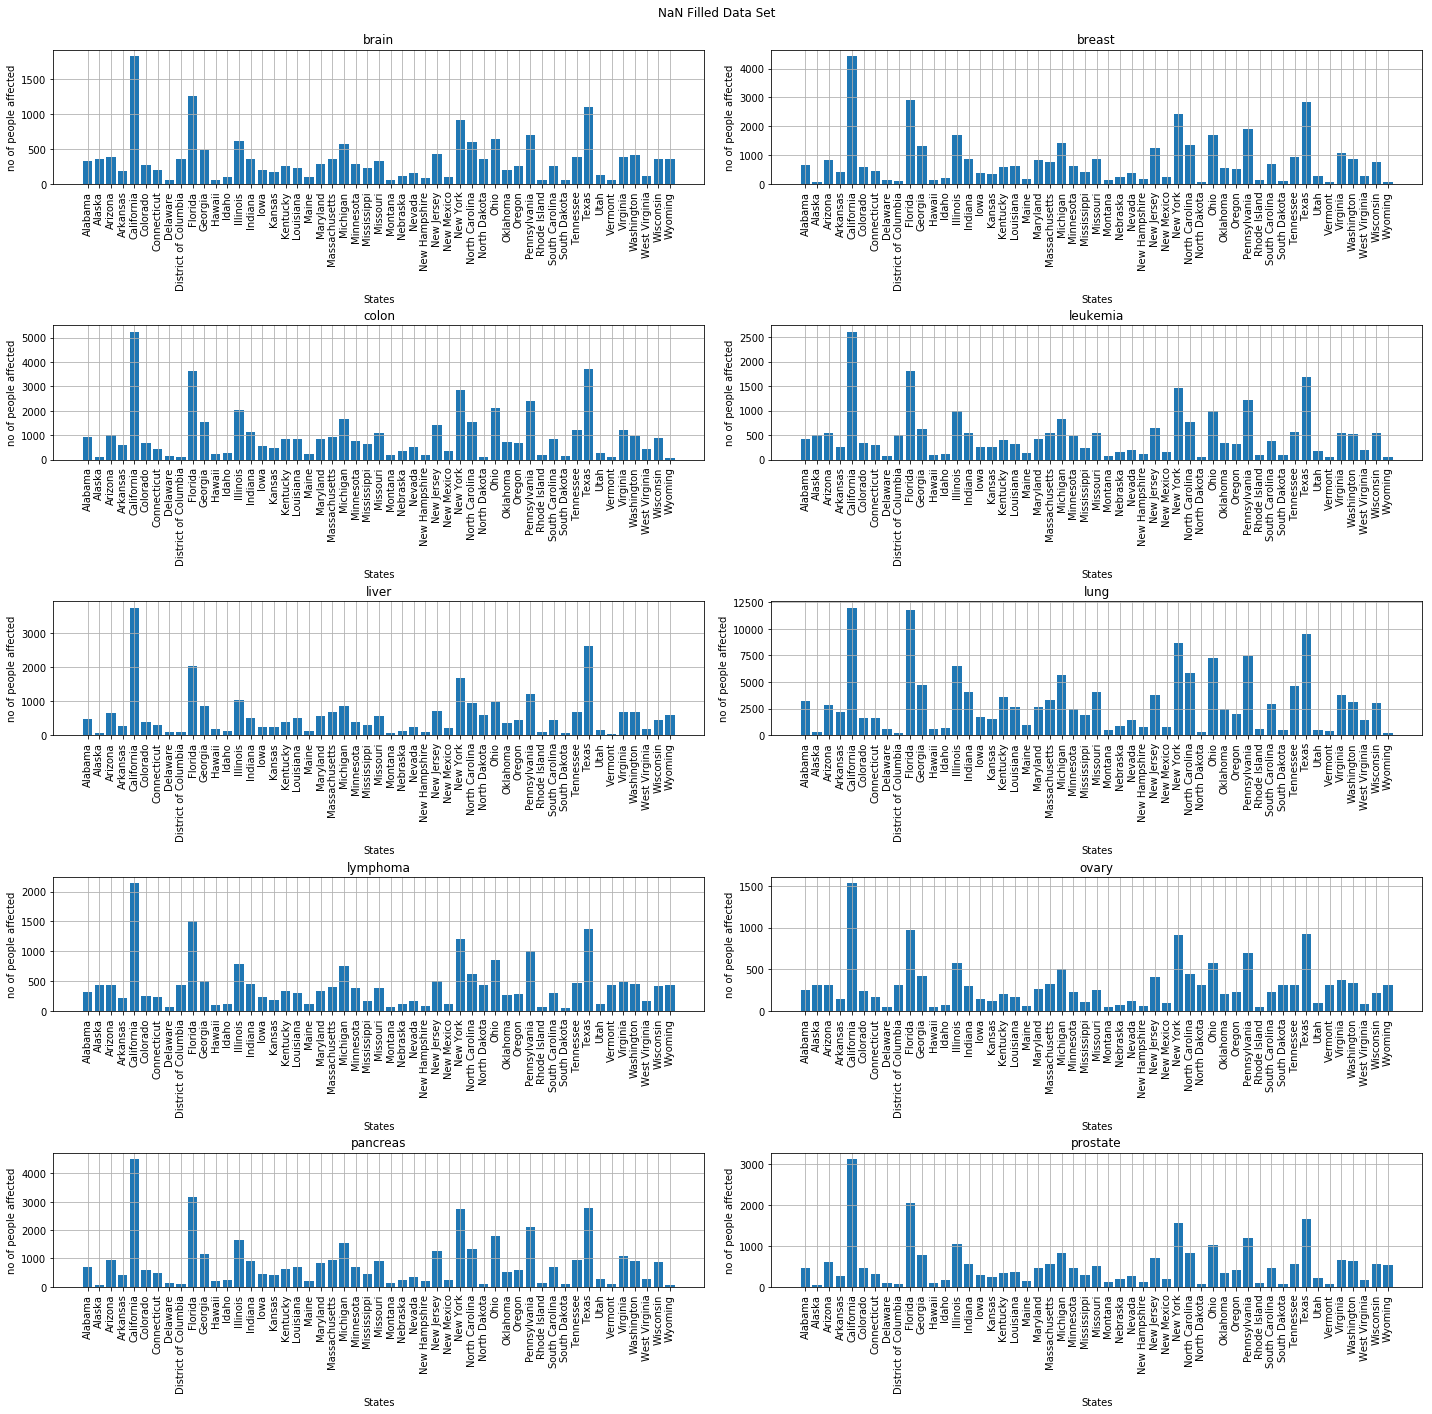

In [ ]:
#After fixing the inconsistent data
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('NaN Filled Data Set')

for row in ax:
    for col in row:
        col.bar(bdf[x],bdf[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

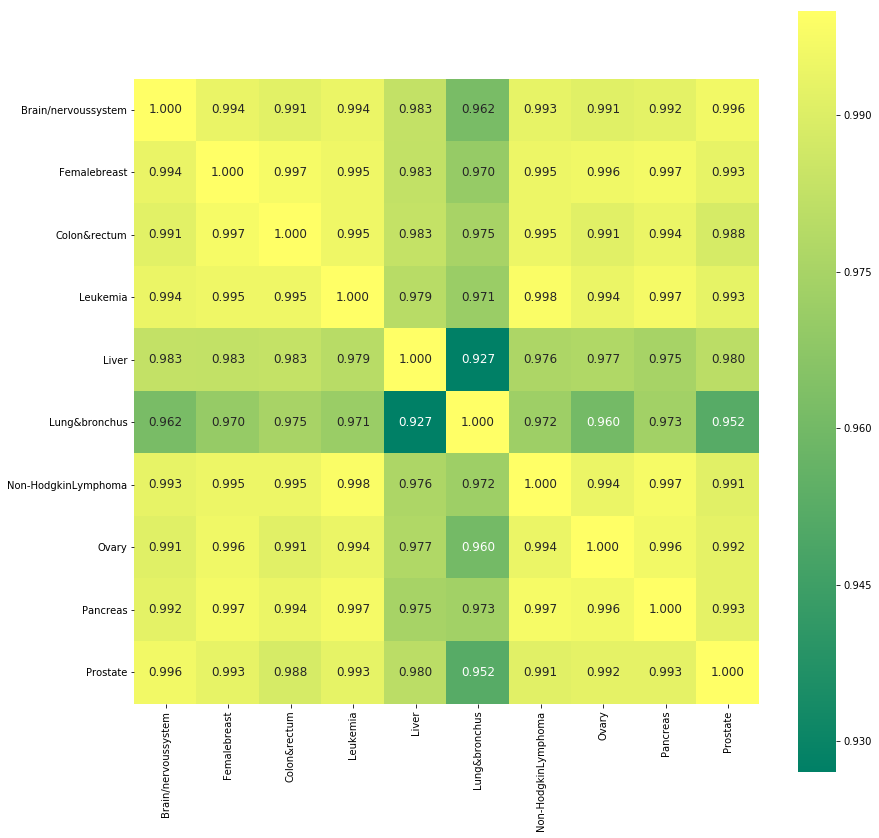

In [ ]:
#Correlation between various types of cancer using heatmap
cancertypes=list(df.columns[1:df.shape[1]])
corr = df[cancertypes].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 12},
           xticklabels= cancertypes, yticklabels= cancertypes,
           cmap= 'summer')

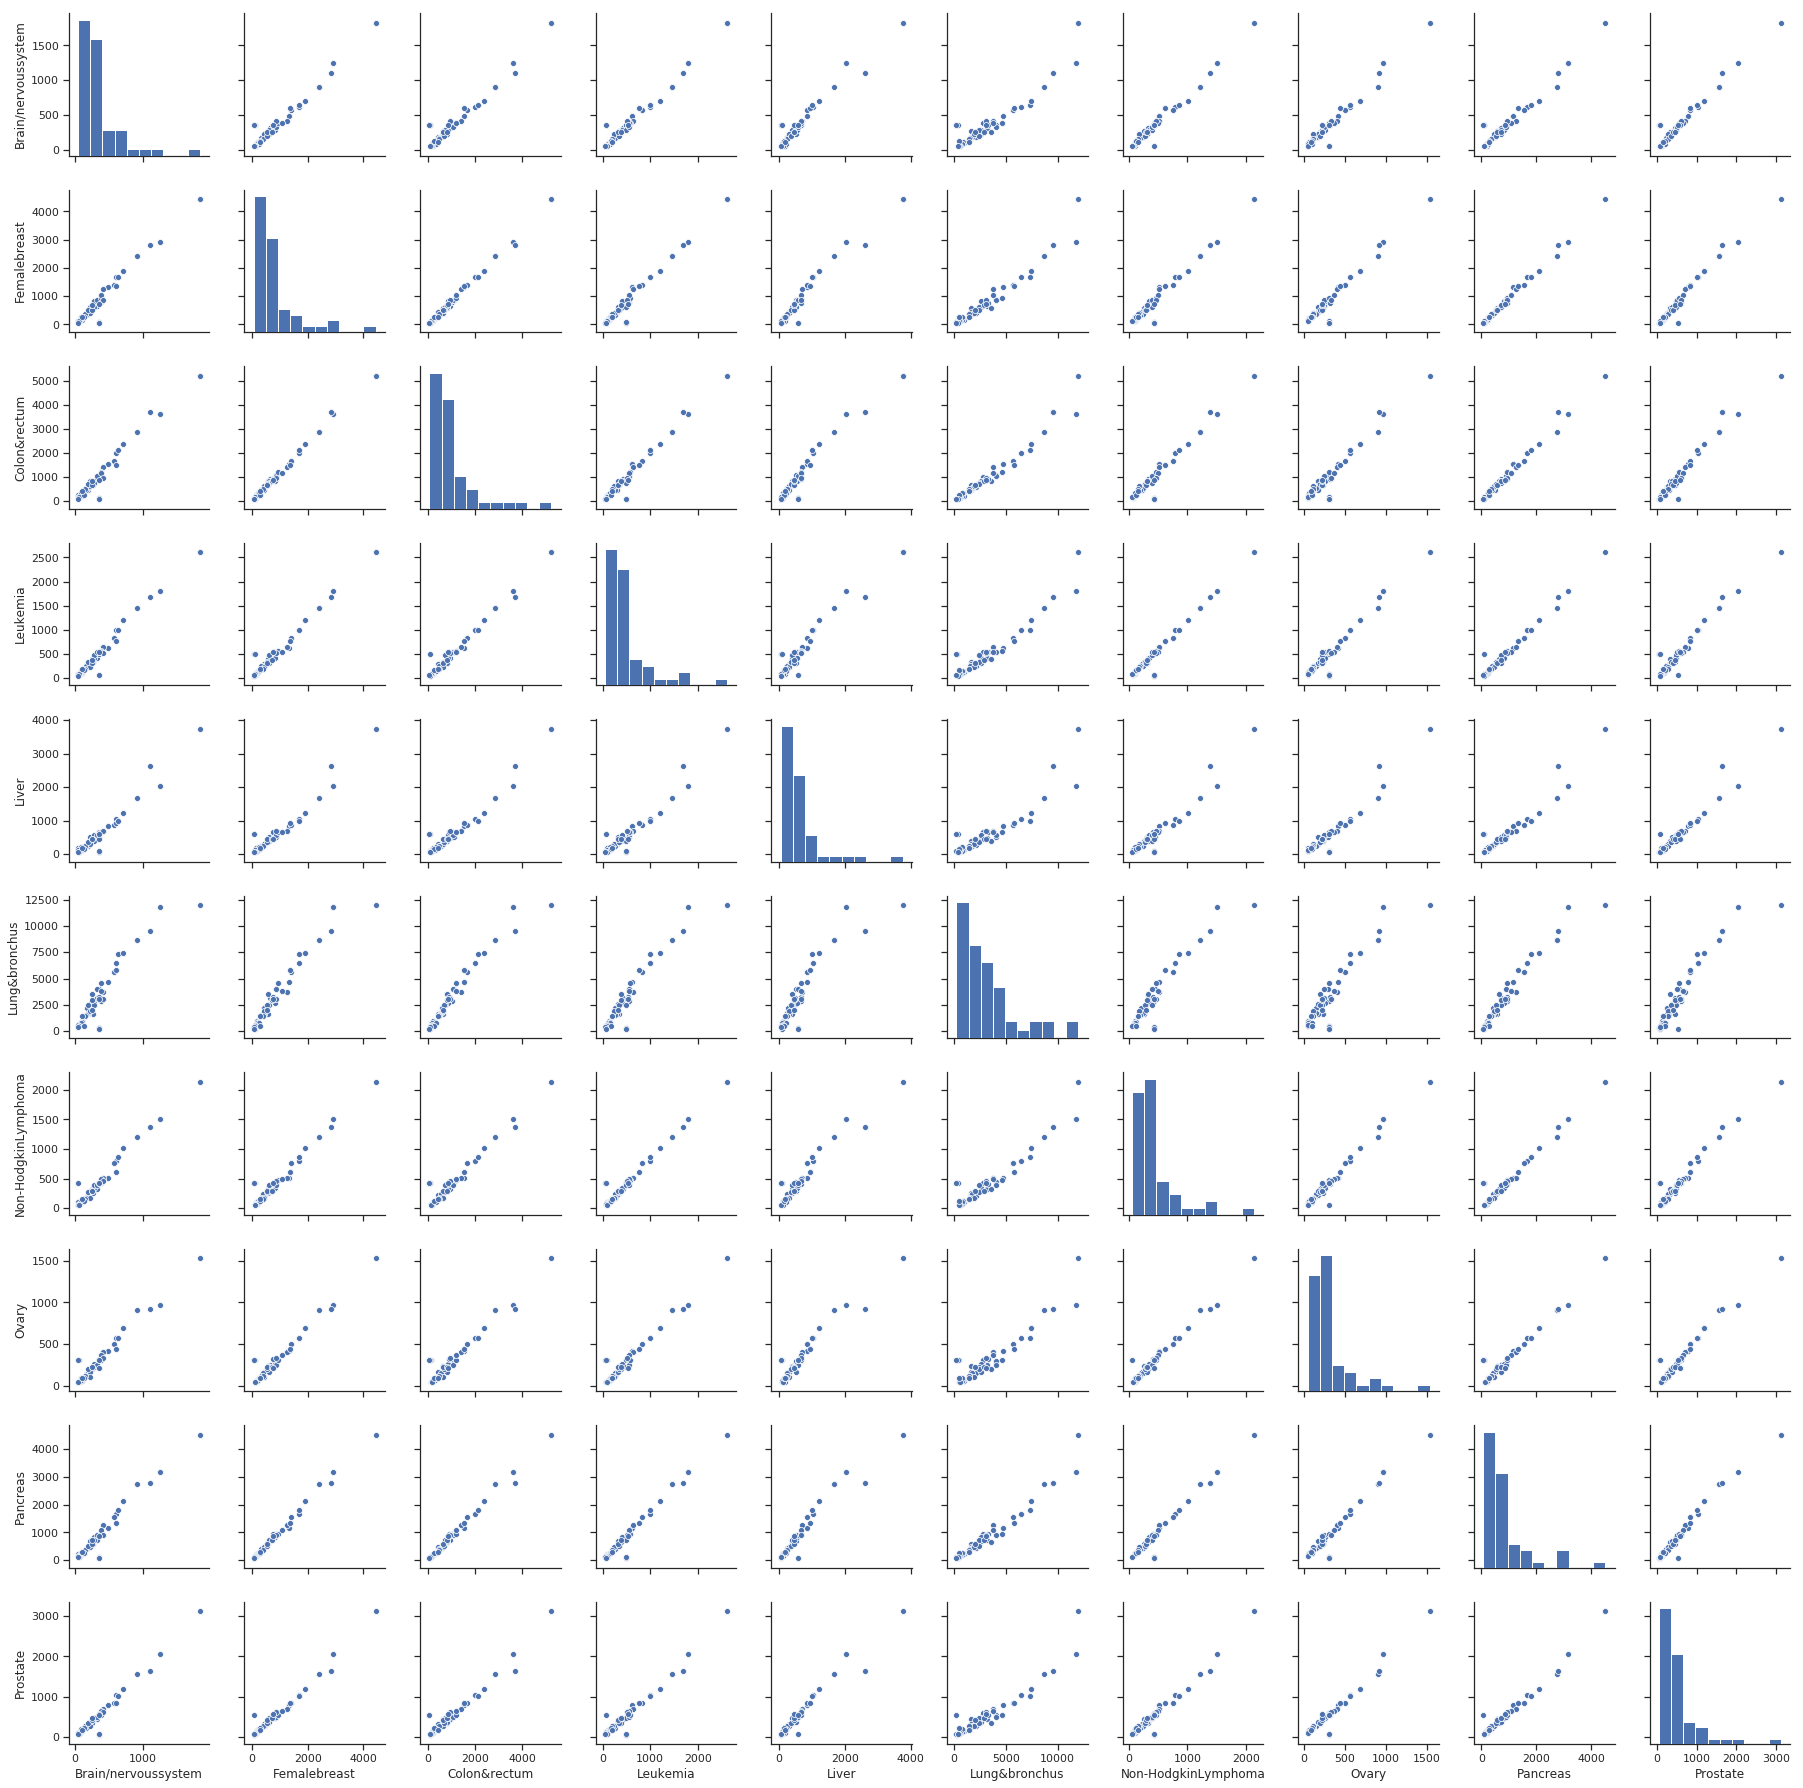

In [ ]:
#Scatter plot
#Drawing scatterplots for joint relationships and histograms for univariate distributions:
cancertypes=list(df.columns[1:df.shape[1]])
sns.set(style="ticks", color_codes=True)
sns.set_style='dark'
sns.pairplot(bdf,kind='scatter',palette='husl',hue=None)

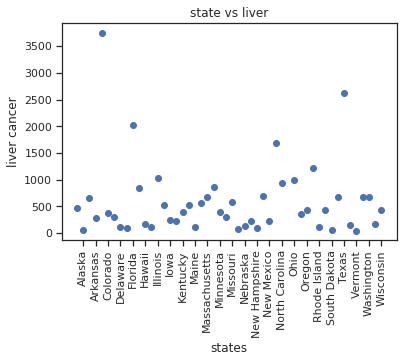

In [ ]:
#scatter plot
import matplotlib.pyplot as plt
x=df["State"]
y=df["Liver"]
plt.scatter(x,y)
plt.title("state vs liver")
plt.xlabel("states")
plt.ylabel("liver cancer")
plt.xticks(np.arange(1,50,step=2),rotation=90)
plt.show()

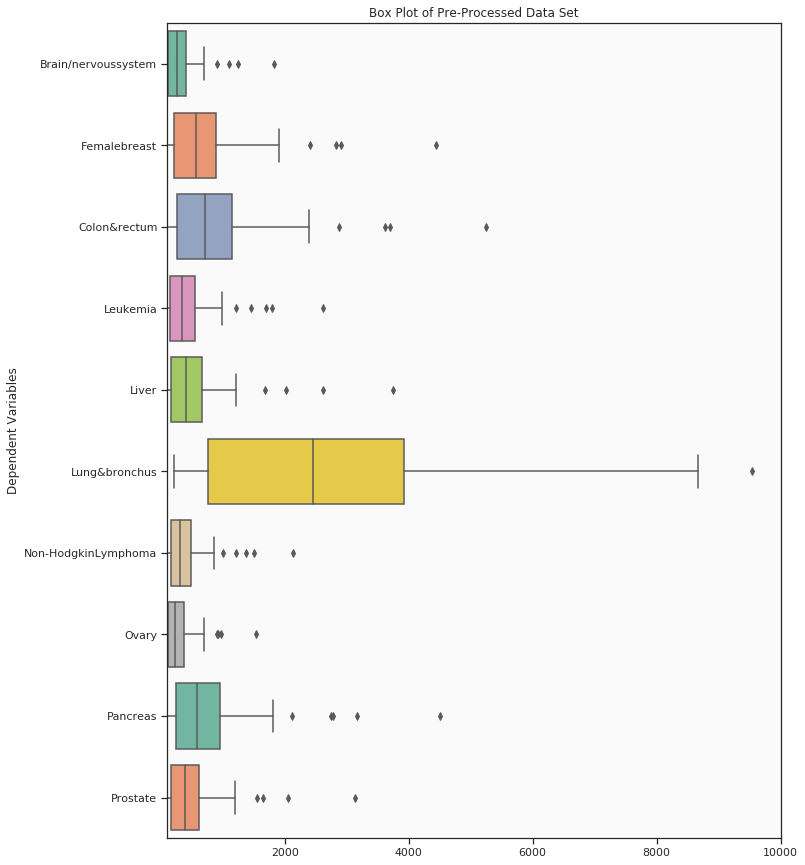

In [ ]:
# visualization using box plot
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(100, 10000))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df, orient = 'h', palette = 'Set2')

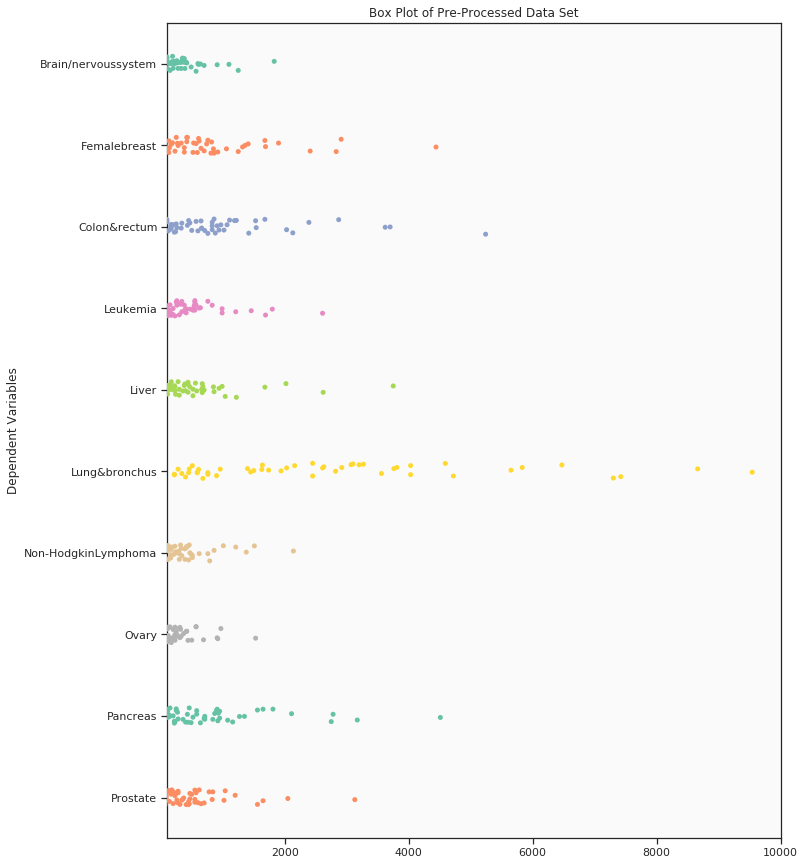

In [ ]:
#visualization using strip plot
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(100, 10000))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.stripplot(data = df, orient = 'h', palette = 'Set2')

([<matplotlib.axis.XTick at 0x7fd47a9937b8>,
 <a list of 22 Text xticklabel objects>)

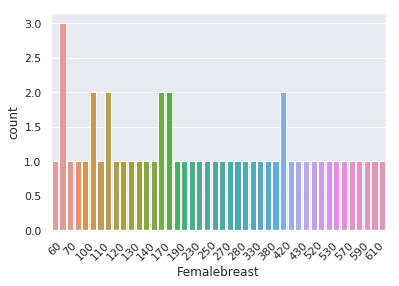

In [ ]:
#count plot
sns.set(style="darkgrid")
sns.countplot(x=df['Femalebreast'],data=df)
plt.xticks(np.arange(0,43,step=2),rotation=45)


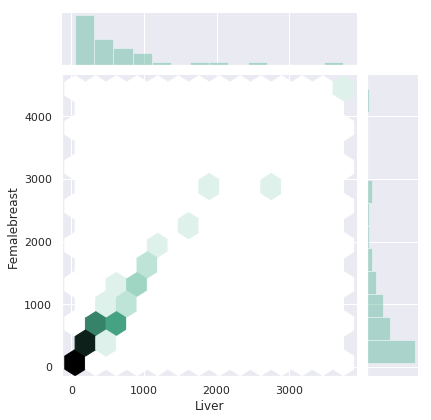

In [ ]:
#joint plot
sns.jointplot(x=df['Liver'], y=df['Femalebreast'], kind="hex", color="#4CB391");

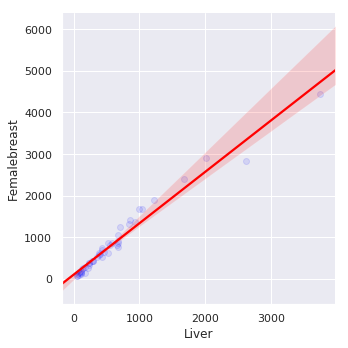

In [ ]:
sns.lmplot(x = 'Liver', y = 'Femalebreast', data = df,scatter_kws = {'alpha':0.1,'color':'blue'},line_kws={'color':'red'})